In [38]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # advanced plotting library
import pickle

# classification unsupervised - clustering

In [2]:
data = pd.read_csv('drug_consumption.data')
# TODO: drop first row altogether because it's just the row number
# TODO: classify by user/non-user
# TODO: handle the classification for specific drug use, then standard scale the remaining numerical 'real' values
data

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [3]:
data_with_headers = pd.read_csv('drug_consumption_with_headers.data')
pd.set_option('max_columns', None)


In [4]:
data_with_headers.head()

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
data_with_headers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       1885 non-null   int64  
 1    Age (Real)                              1885 non-null   float64
 2    Gender (Real)                           1885 non-null   float64
 3    Education (Real)                        1885 non-null   float64
 4    Country (Real)                          1885 non-null   float64
 5    Ethnicity (Real)                        1885 non-null   float64
 6    Nscore (Real) [neuroticism]             1885 non-null   float64
 7    Escore (Real) [Extraversion]            1885 non-null   float64
 8    Oscore (Real) [Openness to experience]  1885 non-null   float64
 9    Ascore (Real) [Agreeableness]           1885 non-null   float64
 10   Cscore (Real) [Conscientiousness]       1885 no

In [6]:
data_with_headers.describe()

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)]
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [20]:
data_with_headers.all()

ID                                         True
 Age (Real)                                True
 Gender (Real)                             True
 Education (Real)                          True
 Country (Real)                            True
 Ethnicity (Real)                          True
 Nscore (Real) [neuroticism]               True
 Escore (Real) [Extraversion]              True
 Oscore (Real) [Openness to experience]    True
 Ascore (Real) [Agreeableness]             True
 Cscore (Real) [Conscientiousness]         True
 Impulsive (Real)                          True
 SS (Real) [sensation seeing (sic)]        True
 Alcohol                                   True
 Amphet                                    True
 Amyl                                      True
 Benzos                                    True
 Caff                                      True
 Cannabis                                  True
 Choc                                      True
 Coke                                   

In [7]:
labels = ['ID', 'Age (Real)', 'Gender (Real)', 'Education (Real)', 'Country (Real)', 'Ethnicity (Real)', 'Nscore (Real) [neuroticism]', 'Escore (Real) [Extraversion]', 'Oscore (Real) [Openness to experience]', 'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]', 'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

In [37]:
data_with_headers.columns

Index(['ID', ' Age (Real)', ' Gender (Real)', ' Education (Real)',
       ' Country (Real)', ' Ethnicity (Real)', ' Nscore (Real) [neuroticism]',
       ' Escore (Real) [Extraversion]',
       ' Oscore (Real) [Openness to experience]',
       ' Ascore (Real) [Agreeableness]', ' Cscore (Real) [Conscientiousness]',
       ' Impulsive (Real)', ' SS (Real) [sensation seeing (sic)]', ' Alcohol',
       ' Amphet', ' Amyl', ' Benzos', ' Caff', ' Cannabis', ' Choc', ' Coke',
       ' Crack', ' Ecstacy', ' Heroin', ' Ketamine', ' Legalh', ' LSD',
       ' Meth', ' Mushrooms', ' Nicotine', ' Semer', ' VSA'],
      dtype='object')

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':' Age (Real)'}>,
        <AxesSubplot:title={'center':' Gender (Real)'}>,
        <AxesSubplot:title={'center':' Education (Real)'}>],
       [<AxesSubplot:title={'center':' Country (Real)'}>,
        <AxesSubplot:title={'center':' Ethnicity (Real)'}>,
        <AxesSubplot:title={'center':' Nscore (Real) [neuroticism]'}>,
        <AxesSubplot:title={'center':' Escore (Real) [Extraversion]'}>],
       [<AxesSubplot:title={'center':' Oscore (Real) [Openness to experience]'}>,
        <AxesSubplot:title={'center':' Ascore (Real) [Agreeableness]'}>,
        <AxesSubplot:title={'center':' Cscore (Real) [Conscientiousness]'}>,
        <AxesSubplot:title={'center':' Impulsive (Real)'}>],
       [<AxesSubplot:title={'center':' SS (Real) [sensation seeing (sic)]'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

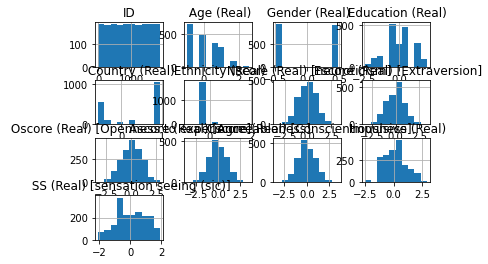

In [14]:
data_with_headers.hist()

<AxesSubplot:>

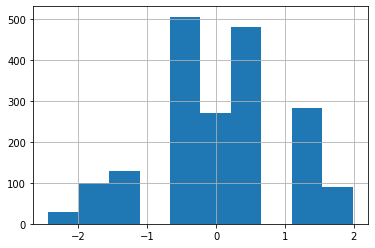

In [13]:
data_with_headers[' Education (Real)'].hist()

In [104]:
data_with_headers[" Cannabis"].value_counts(), data_with_headers[" Crack"].value_counts(), data_with_headers[" Ketamine"].value_counts(),  data_with_headers[" Semer"].value_counts()

(CL6    463
 CL0    413
 CL2    266
 CL3    211
 CL1    207
 CL5    185
 CL4    140
 Name:  Cannabis, dtype: int64,
 CL0    1627
 CL2     112
 CL1      67
 CL3      59
 CL5       9
 CL4       9
 CL6       2
 Name:  Crack, dtype: int64,
 CL0    1490
 CL2     142
 CL3     129
 CL1      45
 CL4      42
 CL5      33
 CL6       4
 Name:  Ketamine, dtype: int64,
 CL0    1877
 CL2       3
 CL3       2
 CL1       2
 CL4       1
 Name:  Semer, dtype: int64)

# Summary 

1. 31 Features, 1885 Samples
2. ID is an INT64, 
3. AGE, GENDER, EDUCATION, COUNTRY, ETHNICITY, are FLOAT64, have designated value for things (.48 = Female, -.48 mile)
4. Nscore, Escore, Oscore, Ascore, Cscore, Impuslive, SS are FLOAT64 to meaurse personality types
5. The Rest Alchohol..Caff..Choc.. are objects that contain a value a "C0" to "C6" to represent the different usages 


In [24]:
data = data_with_headers.copy()

In [25]:
data

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


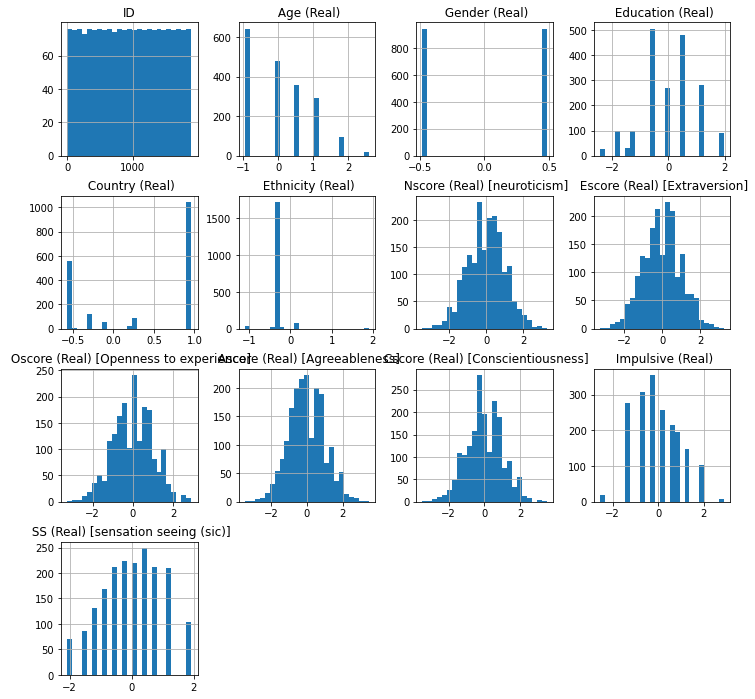

In [28]:
# View all of the histograms (except categorical)
# We discover most are log-normally distributed
data.hist(bins=25, figsize=(12, 12));

In [44]:
personality_labels = [' Escore (Real) [Extraversion]',' Oscore (Real) [Openness to experience]',' Ascore (Real) [Agreeableness]',' Cscore (Real) [Conscientiousness]',' Impulsive (Real)',' SS (Real) [sensation seeing (sic)]']
drug_labels = [' Alcohol',' Amphet', ' Amyl', ' Benzos', ' Caff', ' Cannabis', ' Choc', ' Coke',
       ' Crack', ' Ecstacy', ' Heroin', ' Ketamine', ' Legalh', ' LSD',
       ' Meth', ' Mushrooms', ' Nicotine', ' Semer', ' VSA']
numerical_values = [' Escore (Real) [Extraversion]',' Oscore (Real) [Openness to experience]',' Ascore (Real) [Agreeableness]',' Cscore (Real) [Conscientiousness]',' Impulsive (Real)',' SS (Real) [sensation seeing (sic)]','ID', ' Age (Real)', ' Gender (Real)', ' Education (Real)',
       ' Country (Real)', ' Ethnicity (Real)']


In [48]:
from collections import Counter

In [54]:
alchocoh = Counter(data[' Alcohol'])


array([[<AxesSubplot:title={'center':' Escore (Real) [Extraversion]'}>,
        <AxesSubplot:title={'center':' Oscore (Real) [Openness to experience]'}>],
       [<AxesSubplot:title={'center':' Ascore (Real) [Agreeableness]'}>,
        <AxesSubplot:title={'center':' Cscore (Real) [Conscientiousness]'}>],
       [<AxesSubplot:title={'center':' Impulsive (Real)'}>,
        <AxesSubplot:title={'center':' SS (Real) [sensation seeing (sic)]'}>]],
      dtype=object)

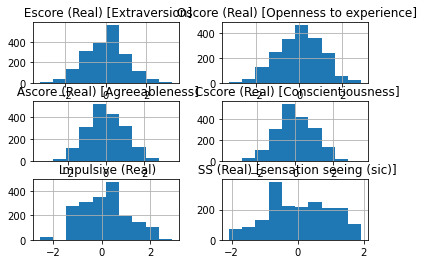

In [59]:
data[personality_labels].hist()

<AxesSubplot:>

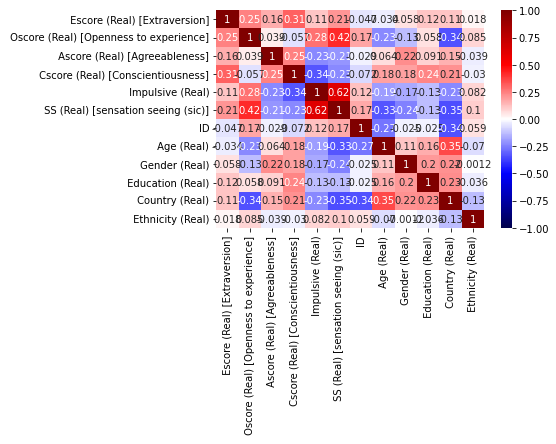

In [61]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[numerical_values].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

<AxesSubplot:>

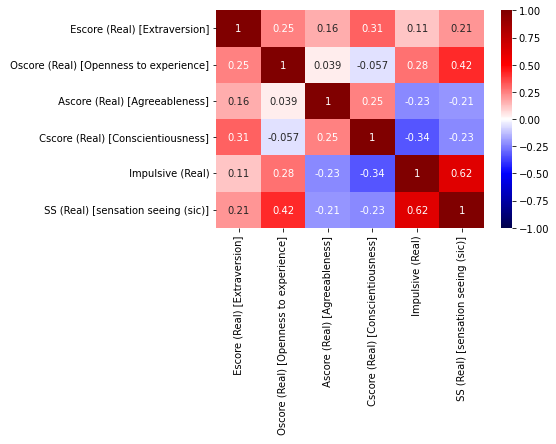

In [60]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[personality_labels].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

<AxesSubplot:>

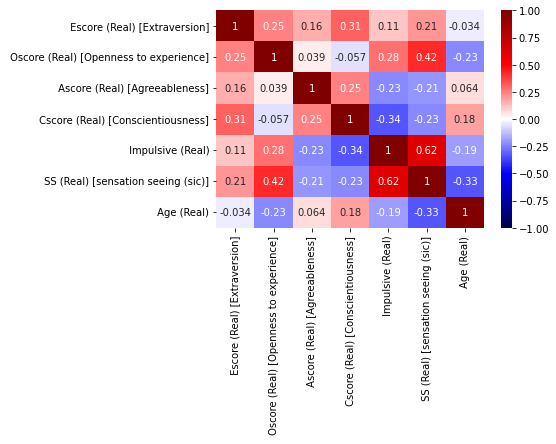

In [63]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[[' Escore (Real) [Extraversion]',' Oscore (Real) [Openness to experience]',' Ascore (Real) [Agreeableness]',' Cscore (Real) [Conscientiousness]',' Impulsive (Real)',' SS (Real) [sensation seeing (sic)]', ' Age (Real)']].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


In [93]:
list_of_drugs = [' Coke',' Meth', ' Heroin', ' Cannabis', ' Ecstacy', ' Benzos', ' Alcohol', ' Amphet', ' Amyl', ' LSD', ' Legalh', ' Semer', ' VSA']

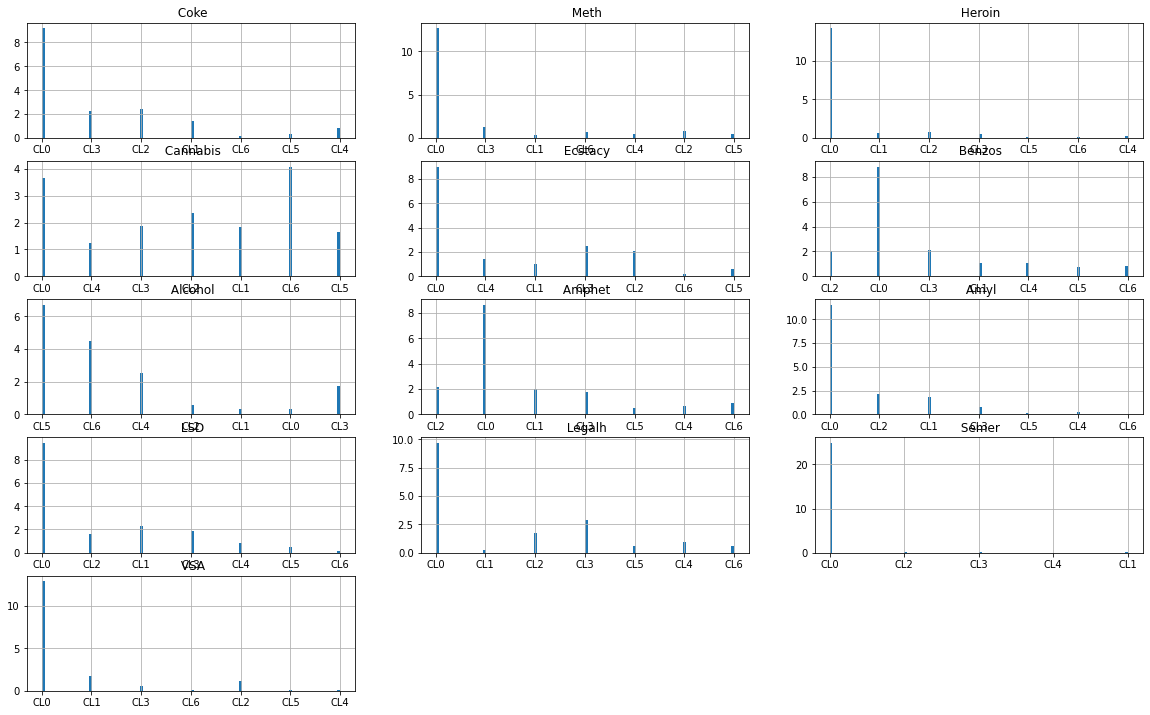

In [103]:
# Distances
plt.figure(figsize=(20, 25))

for i in range(len(list_of_drugs)):
    plt.subplot(10, 3, i+1)
    plt.title(list_of_drugs[i])
    data[list_of_drugs[i]].hist(bins=100, density=True)
    # plt.ylabel("Percent of trips")


In [108]:
highschool_dropout = data[data[' Education (Real)'] < -1.2]

In [109]:
highschool_dropout

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
17,18,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.52135,-1.23177,-0.31776,-0.45321,-1.38502,-1.37983,-0.84637,CL6,CL1,CL1,CL0,CL6,CL6,CL4,CL1,CL0,CL1,CL0,CL2,CL0,CL1,CL0,CL1,CL6,CL0,CL0
21,22,2.59171,-0.48246,-2.43591,0.96082,-0.31685,-1.19430,0.47617,-1.11902,-0.60633,1.81175,-0.21712,-1.18084,CL5,CL0,CL0,CL0,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL1,CL0,CL0
23,24,1.09449,-0.48246,-1.73790,0.96082,-0.31685,1.60383,-3.27393,-1.27553,0.28783,-1.01450,-1.37983,-1.54858,CL6,CL2,CL1,CL5,CL6,CL2,CL6,CL2,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL6,CL0,CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1862,-0.95197,-0.48246,-1.22751,-0.57009,-0.31685,-0.24649,0.32197,0.44585,-0.15487,-0.14277,0.88113,1.22470,CL4,CL3,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL3,CL0,CL6,CL4,CL5,CL6,CL0,CL0
1862,1866,1.09449,-0.48246,-2.43591,-0.57009,-0.31685,0.73545,-0.43999,0.44585,-1.07533,0.25953,0.52975,0.40148,CL6,CL1,CL1,CL6,CL6,CL6,CL6,CL2,CL2,CL1,CL2,CL1,CL0,CL1,CL5,CL1,CL6,CL0,CL0
1871,1875,-0.95197,-0.48246,-1.22751,-0.57009,-0.31685,1.02119,-0.43999,1.43533,-1.07533,0.12331,-0.71126,0.40148,CL6,CL3,CL0,CL3,CL6,CL6,CL4,CL3,CL3,CL3,CL6,CL3,CL5,CL3,CL3,CL0,CL6,CL0,CL6
1873,1877,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,0.73545,-1.23177,0.58331,-0.60633,-0.40581,0.52975,0.40148,CL5,CL3,CL0,CL4,CL6,CL6,CL5,CL3,CL2,CL3,CL2,CL0,CL5,CL2,CL2,CL3,CL6,CL0,CL2
